# Start up profit prediction

Load dependencies

In [1]:
import numpy as np #for mathematical calculations
import matplotlib.pyplot as plt # for visualizations
import pandas as pd # for handling and cleaning data set
import seaborn as sns # for visualization
import sklearn # for model devlopment and evaluation

Load dataset

In [2]:
dataset = pd.read_csv("50_Startups.csv")
dataset.head() # Display the top 5 rows of data set

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Exploratory data analysis

Determine central tendency andhow data is distributed.

In [3]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


Determine the number of duplicates

In [4]:
dataset.duplicated().sum()

0

Check for null values

In [5]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Data type evaluation

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Check for correlation after removing the string data object

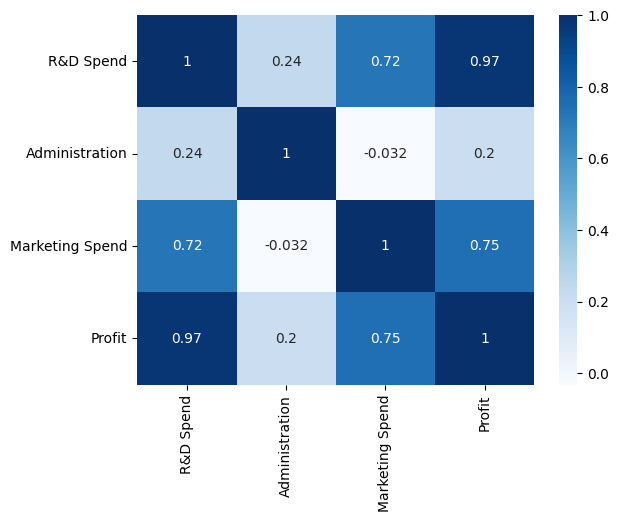

In [7]:
ds = dataset.drop(['State'], axis=1)
c = ds.corr() # corr inbuilt fn
sns.heatmap(c,annot=True,cmap='Blues')
plt.show()

Outlier detection

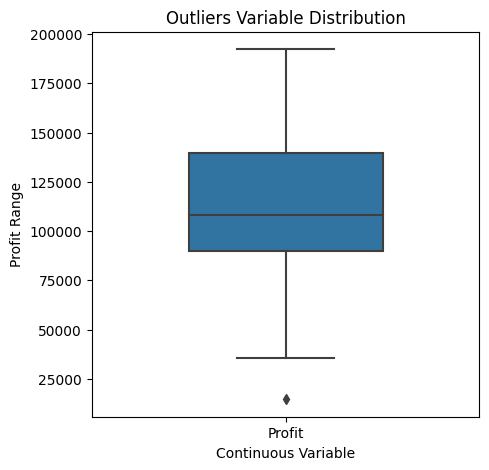

In [8]:
outliers = ['Profit']
plt.rcParams['figure.figsize'] = [5,5]

sns.boxplot(data=dataset[outliers], orient="v" , width=0.5)
plt.title("Outliers Variable Distribution")
plt.ylabel("Profit Range")
plt.xlabel("Continuous Variable")
plt.show()

It can be seen that outliers exist, but lets try and dig deeper and plot box plot relative to each state

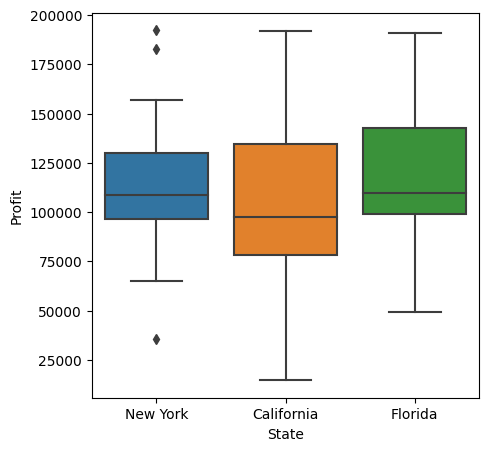

In [9]:
sns.boxplot(x = 'State', y = 'Profit', data = dataset)
plt.show()

Outliers exist mostly in the NY state
Moving on, lets try and understand the distribution of Profit 

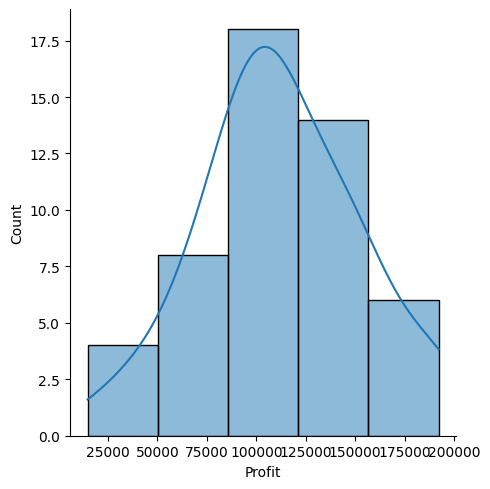

In [10]:
sns.displot(dataset['Profit'],bins = 5, kde = True)
plt.show()

### Pre processing

Split dataset into input and response variable

In [14]:
# spliting Dataset in Dependent & Independent Variables
y = dataset.iloc[:, 4].values
X = dataset.iloc[:, :3].values
print(X[:5,:])

[[165349.2  136897.8  471784.1 ]
 [162597.7  151377.59 443898.53]
 [153441.51 101145.55 407934.54]
 [144372.41 118671.85 383199.62]
 [142107.34  91391.77 366168.42]]


Lets split the data into training and test data

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=0) # performs the split
print("Number of rows in training data: ",len(x_train))
print("Number of rows in test data: ",len(y_test))

Number of rows in training data:  35
Number of rows in test data:  15


### Linear regression model development. 

In [16]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
print(y_pred)

[104054.44293869 132719.3459701  133640.26830949  72294.76911458
 179685.62227843 114508.97572031  66305.23069863  98297.69326565
 114277.91894933 169112.36095691  96257.40152149  87916.97242208
 110687.33942598  90670.8337806  127780.63539583]


### Evaluation of the results 

To begin with lets evaluate the model using model.score function which is the R2 score

In [27]:
model_score = model.score(x_test, y_test)
print("Model Performance on Test data",round(testing_data_model_score*100,2),"%")
 
model_score = model.score(x_train, y_train)
print("Model Performance on Train data",round(training_data_model_score*100,2),"%")b

Model Performance on Test data 93.55 %
Model Performance on Train data 95.15 %


### Conclusion

Since this is a simple demonstarion of the the application of a simple linear regression model depicting the pre processing and exploratory analysis steps involved in ML, we will stop our discussion here. Since we are not using different methods and models to improve our results there is no need to compute evaluation measures like MSE, RMSE etc. It is said that the model performance or score above 0.9 is considered a good fit. Therefore we can conclude that on test data the model is performing quite well.